# Task 1 – Curse of dimensionality and effect of sample size

## For D from 1 to 15 dimensions, simulate 1000 random D-dimensional points, where the value in each dimension is uniformly randomly distributed between -1 and +1. 

## a) Calculate the fraction of these points that are within distance 1 of the origin, giving an approximation of the volume of the unit hypersphere to the hypercube inscribing it. Plot this fraction as a function of D (a scatter plot of D versus the fraction).

In [18]:
import numpy as np
dimension=15
num_points=1000
fractions=[]
for i in range(1,dimension+1):
    points = np.random.uniform(low=-1.0,high=1.0,size=(num_points,i))
    distances=np.linalg.norm(points, axis=1)
    fractions.append(np.sum(distances<1)/len(distances))
    
    

In [19]:
fractions=[]
for i in range(1,dimension+1):
    points = np.random.uniform(low=-1.0,high=1.0,size=(num_points,i))
    distances=np.linalg.norm(points, axis=1)
    fractions.append(np.sum(distances<1)/len(distances))
    
    

Text(0, 0.5, 'Fraction')

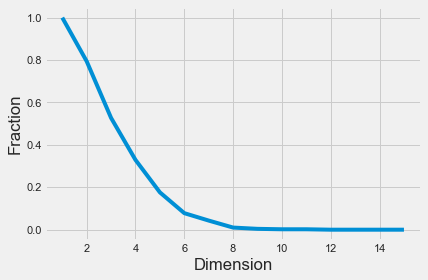

In [20]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib.image as mpimg
plt.plot(np.arange(1,16,1),fractions)
plt.xlabel("Dimension")
plt.ylabel("Fraction")


## b) Use the value of this fraction at D = 2 and D = 3 to get estimates for the value of pi (Π) as you know the area (for D = 2) and volume (for D = 3) formulae for these cases.

In [21]:
#For D=2
print("Pi is ", 4*fractions[1],"for D=2")

Pi is  3.176 for D=2


In [22]:
#For D=3
print("Pi is ", 6*fractions[2],"for D=3")

Pi is  3.162 for D=3


## c) Perform the calculations in part (b) with larger sample sizes. You can use the following set: {5000, 10000, 25000, 50000, 100000}. Visualize the estimated Π for D = 2 and D = 3 cases. Comment on your results

In [23]:
num_points=[5000, 10000, 25000, 50000, 100000]
fractions=[]
fractions_D2=[]
fractions_D3=[]
for i in num_points:
    for j in range(2,4):
        points = np.random.uniform(low=-1.0,high=1.0,size=(i,j))
        distances=np.linalg.norm(points, axis=1)
        fractions.append(np.sum(distances<1)/len(distances))
for i in range(len(fractions)):
    if i%2==0:
        fractions_D2.append(fractions[i])
    else:
        fractions_D3.append(fractions[i])
est_D2=[element * 4 for element in fractions_D2]  
est_D3=[element * 6 for element in fractions_D3]

In [24]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

In [25]:
data = pd.DataFrame({'DataPoints' : num_points,
                                'Estimation for D=2' : est_D2,
                                'Estimation for D=3' : est_D3 }, 
                                columns=['DataPoints','Estimation for D=2', 'Estimation for D=3'])
data=data.set_index('DataPoints')
data              

,Estimation for D=2,Estimation for D=3
DataPoints,,
5000,3.12480,3.17280
10000,3.15000,3.16440
25000,3.13552,3.15816
50000,3.14616,3.15156
100000,3.13956,3.15420


<AxesSubplot:xlabel='DataPoints'>

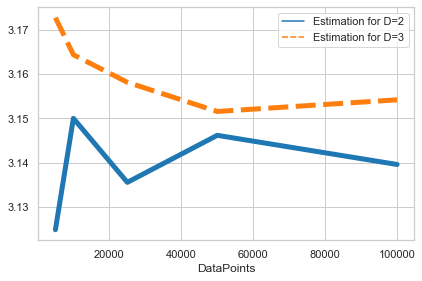

In [26]:
sns.lineplot(data=data,palette="tab10", linewidth=5)

## d) Repeat this simulation, sampling 1000 D-dimensional points from 1 to 15 dimensions, where the value in each dimension is uniformly randomly distributed between -1 and +1. For each value of D, generate an additional 100 test instances and calculate the distance to each test instance’s nearest neighbor. Plot the average distance from the test instances to their nearest neighbors as a function of D.

In [27]:
import numpy as np
dimension=15
num_points=1000
test_num_points=100
fractions=[]

for i in range(1,dimension+1):
    points = np.random.uniform(low=-1.0,high=1.0,size=(num_points,i))
    test_points = np.random.uniform(low=-1.0,high=1.0,size=(test_num_points,i))

In [31]:
def nearest_neighbor (dimensions, test_dim):
    dist=np.sqrt(np.sum((dimensions-test_dim)**2, axis=1))
    return np.min(dist)

In [ ]:
neighbor <- function(dim){
    df = data.table(replicate(dim, runif(1100, min = -1, max = 1)))
    d = dist(df,  method = "euclidean")
    distances = as.matrix(d)[1:1000,1001:1100]
    closest_distance <- apply(distances,2,min)
    avg = mean(closest_distance)
    return(avg)
    }
nn = c()
for(d in 1:15){
    nn <- c(nn, neighbor(d))
}
nn_dt = data.table(dim=c(1:15), average_min_distance=nn)
plot(nn_dt)

In [ ]:
means = {}
for D in range(dimension):
    mins = []    
    for i in test_points[D]:
        dist1 = []
        for j in points[D]:
            dist1.append(euc_dist(i,j))           
        mins.append(min(dist1))
    
    means[D] = np.mean(mins)

# Task 2 – Practicing data manipulation skills on images
## a) Read image as a variable in R/Python. You need to install “jpeg” package to read image into a variable if you use R. For Python, an alternative is to use matplotlib package. What is the structure of the variable that stores the image? What is the dimension? a. Display the image

In [ ]:
import matplotlib.image as mpimg
img=mpimg.imread('IMG.jpg')
imgplot=plt.imshow(img)
print('Structure: ',type(img))
print('# of dims: ',img.ndim)     
print('Img shape: ',img.shape)  
print('Dtype: ',img.dtype)
plt.show()


## b) Display each channel as separate image

In [ ]:
channel_0 = img.copy()
channel_0 =channel_0[:, :, 0] 
channel_1 = img.copy()
channel_1 =channel_1[:, :, 1] 
channel_2 = img.copy()
channel_2 =channel_2[:, :, 2] 

channels = np.concatenate((channel_0, channel_1, channel_2), axis=1)
im_RGB = np.hstack((channel_0, channel_1, channel_2))
im_RGB = np.c_['1', channel_0, channel_1, channel_2]
plt.imshow(im_RGB)
plt.show()



## c) For each channel, take the average of the columns and plot the average as a line plot for each channel on a single plot.

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,5))
for i in range(3):
    channel = img[:,:, i]
    col_avg = np.mean(channel, axis = 0)
    plt.plot(list(range(col_avg.shape[0])), col_avg, label=f"CH{i}")
plt.legend()
plt.show()

## d) For each channel, subtract one half of the image from the other half (choice of halves is up to you but dividing the head image vertically into two parts make more sense). If you observe negative pixel values, you can make them equal to zero. Then:
   ## • Display the new image. 
   ## • Display each channel separately as separate image.

In [ ]:
half=img.shape[1]//2
left_half=img[:,:half,:]

plt.imshow(left_half)

In [ ]:
half=img.shape[1]//2
left_half=img[:,:half,:]
right_half=img[:,half:,:]
left_half=left_half-right_half
left_half=left_half.clip(min=0)
print('channel 0')
plt.imshow(left_half[:,:,0])
plt.show()
print('channel 1')
plt.imshow(left_half[:,:,1])
plt.show()
print('channel 2')
plt.imshow(left_half[:,:,2])
plt.show()
print('all channels')
plt.imshow(left_half)
plt.show()

## e) In order to create a noisy image, add a random noise from uniform distribution with minimum value of 0 and a maximum value of “0.1 * maximum pixel value observed” to each pixel value for each channel of original image. • Display the new image. • Display each channel separately as separate image.

In [ ]:
noise = np.random.uniform(0, 0.1*np.max(img), size=img.shape)
noisy_image=noise+img
noisy_image=noisy_image.clip(0,255).astype(int)
print('channel 0')
plt.imshow(noisy_image[:,:,0])
plt.show()
print('channel 1')
plt.imshow(noisy_image[:,:,1])
plt.show()
print('channel 2')
plt.imshow(noisy_image[:,:,2])
plt.show()
print('all channels')
plt.imshow(noisy_image[:,:,:])
plt.show()
